In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
import seaborn as sns
from matplotlib import colors
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

In [3]:
meta = pd.read_excel("Extended Data Table 1.xlsx",index_col=0)
scores = pd.read_excel("Extended Data Table 3.xlsx",index_col=0)
Expr = pd.read_table('expr_LOY_allgenes_FPKM.txt',sep=' ')

# Figure 1

In [4]:
data_percan = meta.groupby(['CancerType','Y_status']).size().reset_index(name='count')
data_percan = data_percan.pivot_table(index='CancerType',columns='Y_status',
                                values='count', fill_value=0)
row_sum = data_percan.sum(axis=1)
data_percan = data_percan.div(row_sum,axis='rows')
data_percan = data_percan.sort_values(by='LOY', ascending=False)


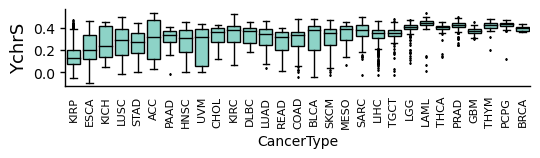

In [17]:
fig, ax = plt.subplots(figsize=(6,1))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)

ax.grid(False)

plt.tick_params(left=True, bottom=False)
plt.tick_params(which='major',width=1)


y_majorocator=MultipleLocator(0.2)
ax.yaxis.set_major_locator(y_majorocator)

plt.ylabel('YchrS',fontsize=13)

PROPS = {
    'boxprops':{ 'edgecolor':'black'},
    'medianprops':{'color':'black'},
    'whiskerprops':{'color':'black'},
    'capprops':{'color':'black'},
}

flierprops = dict(markerfacecolor='black', markeredgecolor='black')

ax = sns.boxplot(data=meta, x='CancerType', y='YchrS',order=data_percan.index,saturation=1,fliersize=1,flierprops=flierprops,
                 color='#8DD3C7',width=0.8,linewidth=1,**PROPS
                 )
labels = ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=8)
plt.savefig('Fig1b_TCGA_boxplot_YchrS.pdf',bbox_inches='tight',dpi=300,transparent=True)

/var/folders/wy/2kx_t2m92pv3l3x9gs9h2z9m0000gt/T/ipykernel_95296/84395435.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  labels = ax.set_xticklabels(data_percan.index, rotation=90, fontsize=8)


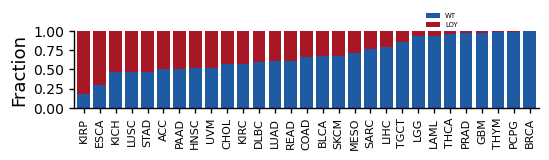

In [18]:
fig, ax = plt.subplots(figsize=(6,1))
#Remove the frame
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
#Remove grid
ax.grid(False)
#Line width for ticks
plt.tick_params(left=True, bottom=True)
plt.tick_params(which='major',width=1)
labels = ax.set_xticklabels(data_percan.index, rotation=90, fontsize=8)

y_majorocator=MultipleLocator(0.25)
ax.yaxis.set_major_locator(y_majorocator)
plt.ylim(0, 1)
plt.xlim(-0.6,28.6)

plt.ylabel('Fraction',fontsize=13)

plt.bar(data_percan.index,data_percan['WT'],width=0.8,color='#1e5ba2',align='center',label='WT')
plt.bar(data_percan.index,data_percan['LOY'],width=0.8,bottom=data_percan['WT'],color='#a81726',align='center',label='LOY')
plt.legend(loc = (0.75,1), fontsize = 5, frameon=False)
plt.savefig('Fig1b_TCGA_barplot_LOY_WT_fraction.pdf',bbox_inches='tight',dpi=300,transparent=True)

# ExtendedData Fig1b

In [16]:
data = pd.DataFrame(meta.groupby(['CancerType','Y_status'])['YchrS'].mean()).reset_index()
catype = ['KIRP','ESCA','KICH','LUSC','STAD','ACC','PAAD','HNSC','UVM','CHOL','KIRC','DLBC',
          'LUAD','READ','COAD','BLCA','SKCM','MESO','SARC','LIHC','TGCT','LGG','LAML','THCA',
          'PRAD','GBM','THYM','PCPG']


/var/folders/wy/2kx_t2m92pv3l3x9gs9h2z9m0000gt/T/ipykernel_66422/910704612.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  labels = ax.set_xticklabels(catype, rotation=90, fontsize=8)


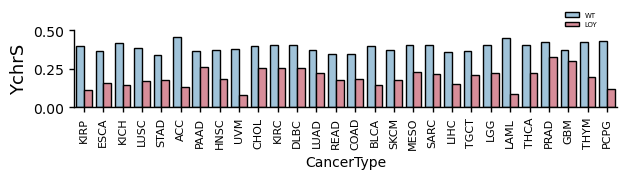

In [23]:
fig, ax = plt.subplots(figsize=(7,1))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
ax.grid(False)

plt.tick_params(left=True, bottom=True)
plt.tick_params(which='major',width=1)
labels = ax.set_xticklabels(catype, rotation=90, fontsize=8)

plt.ylim(0, 0.5)
plt.xlim(-0.6,27.6)

plt.ylabel('Mean YchrS',fontsize=13)

sns.barplot(data,x='CancerType', y='YchrS',hue='Y_status', width=0.8,palette={'LOY':'#E38191', 'WT':'#96C5E2'},
            edgecolor='Black',order=catype,hue_order=['WT','LOY'])
plt.legend(loc = (0.9,1), fontsize = 5, frameon=False)
plt.savefig('ExtendedData_Fig1_PerCancertype_WTLOY_YchrS.pdf',bbox_inches='tight',dpi=300, transparent=True)

# ExtendedData Fig2a

In [30]:
#Wilcox-test
import scipy

data = meta.loc[~meta['Smoking'].isna(),:].copy()

Low = data.loc[data['Smoking']=='Current/Ever',:].copy()
High = data.loc[data['Smoking']=='Never',:].copy()

P_val = []
Ca = list(data['CancerType'].unique())
for ca in Ca:
    l = Low.loc[Low['CancerType']==ca,'YchrS']
    h = High.loc[High['CancerType']==ca,'YchrS']
    res = scipy.stats.ranksums(l, h)
    P_val = P_val + [res.pvalue]

P_vals = pd.DataFrame({'P_val':P_val}, index = Ca)

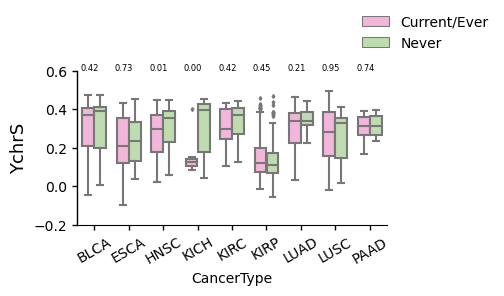

In [32]:
fig, ax = plt.subplots(figsize=(4,2))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)

ax.grid(False)

plt.tick_params(left=True, bottom=True)
plt.tick_params(which='major',width=1)
labels = ax.set_xticklabels([], rotation=30, fontsize=10)

plt.ylim(-0.2, 0.6)

plt.ylabel('YchrS',fontsize=13)

ax = sns.boxplot(data=data, x='CancerType', y='YchrS',hue='Smoking',saturation=1,#order=catype,
                 palette={'Current/Ever':'#F1B6DA','Never':'#BEDCB0'},width=0.7,fliersize=2,
                 order=P_vals.index)
plt.legend(loc=(0.9,1.1),frameon=False)#loc = (1,0.25), fontsize = 17,

for i in range(P_vals.shape[0]):
    plt.text(s='%.2f'%P_vals.loc[P_vals.index[i],'P_val'],x=i-0.4,y=0.6,fontsize=6)
plt.savefig('ExtendedData_Fig2a_TCGA_Ychr_Cancertype_Smoking.pdf',bbox_inches='tight',dpi=300,transparent = True)

# Figure 2

In [5]:
def get_pws(scores,meta,pathways):
    scores = scores.loc[:,pathways].copy()
    #Scaling
    from sklearn import preprocessing
    scores = pd.DataFrame(preprocessing.scale(scores),index=scores.index, columns=scores.columns)
    scores['YchrS_level'] = meta['YchrS_level'].copy()
    #get mean
    pws = pd.DataFrame(scores.groupby('YchrS_level').mean())
    pws = pws.T.copy()
    #get p
    import scipy
    P_val = []
    WTY = scores.loc[scores['YchrS_level']=='WTY_BR',:].copy()
    LOY = scores.loc[scores['YchrS_level']=='LOY_BR',:].copy()
    for path in pathways:
        res = scipy.stats.ranksums( LOY[path].dropna(),WTY[path].dropna())
        P_val = P_val + [res.pvalue]
    pws['Pval'] = P_val
    #adjust p
    from statsmodels.stats.multitest import multipletests
    pws['Pval_adjusted'] = multipletests(pws['Pval'], method = 'fdr_bh')[1]
    return pws
    
def get_data(pws):
    data = pd.DataFrame(index=range(0,pws.shape[0]*2),
                        columns = ['Ylevel','Pathway','score','logp'])
    LOY = ['WTY_BR','LOY_BR']
    data['Pathway']=list(pws.index)*2
    score = []
    logp = []
    Ylevel = []
    for loy in LOY:
        Ylevel = Ylevel + [loy]*pws.shape[0]
        score = score + list(pws[loy])
    import math
    logp = [-math.log(i,10) for i in pws['Pval_adjusted']]*2
    for i in range(len(logp)):
        if logp[i]>10:
            logp[i]=10

    data['Ylevel'] = Ylevel
    data['score'] = score
    data['logp'] = logp
    return data

# Fig2c

In [6]:
HRD = ['AL1','LST1','HRD-LOH','HRD']
Genomic_instbility = ['HALLMARK_DNA_REPAIR','DDR','Mismatch_Repair',
            'Homologous_recombination','Nucleotide_excision_repair',
            'Base_excision_repair' ]

In [7]:
pws = get_pws(scores,meta,Genomic_instbility+HRD)
data = get_data(pws)

/var/folders/wy/2kx_t2m92pv3l3x9gs9h2z9m0000gt/T/ipykernel_3242/2365768002.py:55: UserWarning: FixedFormatter should only be used together with FixedLocator
  labels = ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=4)
/var/folders/wy/2kx_t2m92pv3l3x9gs9h2z9m0000gt/T/ipykernel_3242/2365768002.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  labels = ax.set_yticklabels(ax.get_yticklabels(), fontsize=4)


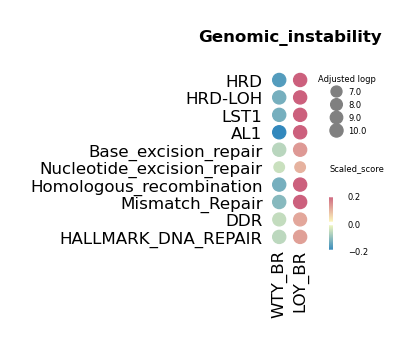

In [8]:
vmin = -0.2 
vmax = 0.2 
norm = colors.Normalize(vmin=vmin,vmax=vmax)

fig, ax = plt.subplots(figsize=(0.3,0.8),dpi=300)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

sc = ax.scatter(
        x='Ylevel',
        y="Pathway",
        s="logp",
        linewidths= 0.3,
        c='score',
        cmap=sns.color_palette("blend:#3288BD,#FFFFBF,#CC607D", as_cmap=True),
        norm=norm,
        data=data,
        marker="o",
)

handles, labels = sc.legend_elements(
        prop='sizes',
        color="gray",
        num=4,
        fmt="{x:.1f}"
)
ax.legend(
    handles,
    labels,
    title="Adjusted logp",
    bbox_to_anchor=(1, 1),
    loc="upper left",
    frameon=False,
    handletextpad=0.5,
    labelspacing=0.5,
    fontsize=2,
    title_fontsize = 2
)

cbar = fig.colorbar(
        sc,
        shrink=0.3,
        aspect=15,
        anchor=(0.2, 0),
        location="right",
        pad=0.25
    )
cbar.ax.yaxis.set_tick_params(color="white", direction="in", left=True, right=True,labelsize=2)
cbar.ax.set_title("Scaled_score", loc="left",fontsize=2)
for key, spine in cbar.ax.spines.items():
    spine.set_visible(False)

labels = ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=4)
labels = ax.set_yticklabels(ax.get_yticklabels(), fontsize=4)
plt.tick_params(which='major',width=0.5)
plt.xlim(-0.5, 1.5) 
plt.ylim(-0.8, data.shape[0]/2-0.2) 
ax.set_title('Genomic_instability',fontweight = 'bold',fontsize=4)
ax.grid(False)
plt.tick_params(left=False, bottom=False)
plt.tick_params(axis='y', pad=-2)
plt.tick_params(axis='x', pad=-4)

plt.savefig('Fig2c_TCGA_HRD_Genomic_instability_pathways_noDNA.pdf',bbox_inches='tight',dpi=300)

# Fig2d

In [9]:
Stemness = ['DNAss','EREG-METHss', 'DMPss', 'ENHss']
Proliferation = ['HALLMARK_E2F_TARGETS', 'HALLMARK_G2M_CHECKPOINT',
    'HALLMARK_HEDGEHOG_SIGNALING','HALLMARK_KRAS_SIGNALING_DN',
    'HALLMARK_KRAS_SIGNALING_UP','HALLMARK_MITOTIC_SPINDLE',
    'CellCycle_Reg','Cell_cycle','DNA_replication', 'Proliferation']
Oncogenesis = ['HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION',
    'HALLMARK_MTORC1_SIGNALING',
    'HALLMARK_MYC_TARGETS_V1','HALLMARK_MYC_TARGETS_V2',]

In [10]:
pws = get_pws(scores,meta,Oncogenesis+Proliferation+Stemness)
data = get_data(pws)

/var/folders/wy/2kx_t2m92pv3l3x9gs9h2z9m0000gt/T/ipykernel_3242/2548990165.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  labels = ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=4)
/var/folders/wy/2kx_t2m92pv3l3x9gs9h2z9m0000gt/T/ipykernel_3242/2548990165.py:55: UserWarning: FixedFormatter should only be used together with FixedLocator
  labels = ax.set_yticklabels(ax.get_yticklabels(), fontsize=4)


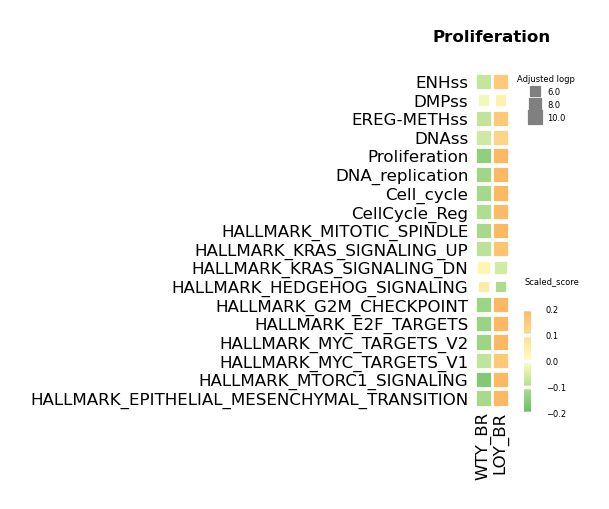

In [11]:
vmin = -0.2
vmax = 0.2 
norm = colors.Normalize(vmin=vmin,vmax=vmax)

fig, ax = plt.subplots(figsize=(0.25,1.5),dpi=300)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

sc = ax.scatter(
        x='Ylevel',
        y="Pathway",
        s="logp",
        linewidths= 0.3,
        c='score',
        cmap=sns.color_palette("blend:#66BD63,#FFFFBF,#FDB863", as_cmap=True),
        norm = norm,
        data=data,
        marker="s",
)

handles, labels = sc.legend_elements(
        prop='sizes',
        color="gray",
        num=4,
        fmt="{x:.1f}"
)
ax.legend(
    handles,
    labels,
    title="Adjusted logp",
    bbox_to_anchor=(1, 1),
    loc="upper left",
    frameon=False,
    handletextpad=0.5,
    labelspacing=0.5,
    fontsize=2,
    title_fontsize = 2
)
cbar = fig.colorbar(
        sc,
        shrink=0.3,
        aspect=15,
        anchor=(0.2, 0), 
        location="right",
        pad=0.25
    )
cbar.ax.yaxis.set_tick_params(color="white", direction="in", left=True, right=True,labelsize=2)
cbar.ax.set_title("Scaled_score", loc="left",fontsize=2)
for key, spine in cbar.ax.spines.items():
    spine.set_visible(False)

labels = ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=4)
labels = ax.set_yticklabels(ax.get_yticklabels(), fontsize=4)
plt.tick_params(which='major',width=0.5)
plt.xlim(-0.5, 1.5) 
plt.ylim(-0.8, data.shape[0]/2-0.2) 
ax.set_title('Proliferation',fontweight = 'bold',fontsize=4)
ax.grid(False)
plt.tick_params(left=False, bottom=False)
plt.tick_params(axis='y', pad=-2)
plt.tick_params(axis='x', pad=-4)

plt.savefig('Fig2d_TCGA_stemness_Proliferation_Oncogenesis.pdf',bbox_inches='tight',dpi=300, transparent=True)

# Fig 2h

In [12]:
receptor = ['ICOS','KIR2DL3','KIR2DL1', 'TNFRSF14', 'CD40', 'HAVCR2', 'IL2RA',
        'TNFRSF4','CD27','LAG3','TNFRSF9','TNFRSF18','TIGIT','PDCD1','CTLA4']
coihb = ['PDCD1LG2','CD274','VTCN1', 'SLAMF7', 'BTN3A2', 'BTN3A1', 'CD276']

In [13]:
Expr = Expr.T.copy()
Expr.index = [i[:-3] for i in Expr.index]
Expr = Expr.loc[meta.index,:].copy()

In [14]:
pws = get_pws(Expr,meta,coihb+receptor)
data = get_data(pws)

In [15]:
Expr

,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,LINC00550,HCP5B,LINC00602,MIR1291,SNORD38B,PAX6-AS1,PAUPAR,GIMAP1-GIMAP5,SNORA50A,LINC01144
Sample,,,,,,,,,,,,,,,,,,,,,
TCGA-OR-A5J1,17.863986,10.668910,18.992954,14.553959,12.456407,15.149487,14.351606,20.030364,17.074178,19.015504,...,0.0,10.701363,12.894094,12.191894,0.0,0.000000,0.000000,0.0,0.0,16.424083
TCGA-OR-A5J5,18.011329,0.000000,18.077557,15.153309,13.335594,15.530930,12.886736,18.571427,15.777423,17.373700,...,0.0,13.014120,12.725175,0.000000,0.0,9.118207,9.118207,0.0,0.0,15.509588
TCGA-OR-A5J8,17.346122,9.671999,19.609429,15.055422,14.899273,16.511021,18.187287,21.445489,17.312304,16.487832,...,0.0,11.440187,7.732983,12.930942,0.0,0.000000,0.000000,0.0,0.0,14.148158
TCGA-OR-A5JB,17.182911,0.000000,19.590723,15.039537,15.107421,16.104126,18.795616,19.769148,15.810400,17.888346,...,0.0,10.680180,12.425512,12.170703,0.0,0.000000,0.000000,0.0,0.0,14.896223
TCGA-OR-A5JC,18.088182,9.771693,20.298769,14.556768,13.621678,15.654886,15.737276,20.066062,16.083313,17.453237,...,0.0,9.541417,11.411490,12.615761,0.0,0.000000,0.000000,0.0,0.0,15.158879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-WC-A885,18.530661,0.000000,18.411665,15.325614,13.789511,11.958745,11.881451,19.960444,15.416808,17.766027,...,0.0,12.475040,13.445933,0.000000,0.0,0.000000,0.000000,0.0,0.0,15.168650
TCGA-WC-A888,17.102993,0.000000,18.599642,15.566172,13.156175,14.380795,15.010034,19.685154,16.054293,17.407400,...,0.0,11.692454,12.926254,12.960896,0.0,0.000000,0.000000,0.0,0.0,15.313727
TCGA-WC-A88A,17.438295,0.000000,18.628075,15.371423,14.214346,13.208234,14.307960,19.314680,16.640515,18.891497,...,0.0,0.000000,10.222780,0.000000,0.0,0.000000,0.000000,0.0,0.0,15.301108


/var/folders/wy/2kx_t2m92pv3l3x9gs9h2z9m0000gt/T/ipykernel_3242/3320813241.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  labels = ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=4)
/var/folders/wy/2kx_t2m92pv3l3x9gs9h2z9m0000gt/T/ipykernel_3242/3320813241.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  labels = ax.set_yticklabels(ax.get_yticklabels(), fontsize=4)


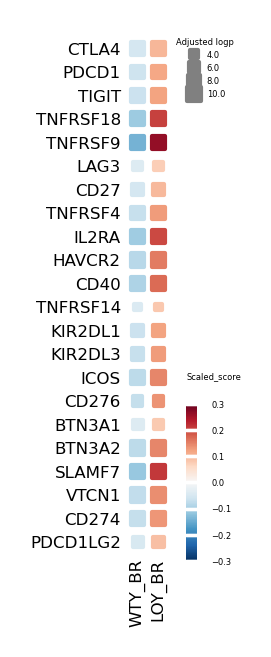

In [16]:
vmin = -0.3
vmax = 0.3
norm = colors.Normalize(vmin=vmin,vmax=vmax)
cmap = 'RdBu_r'

fig, ax = plt.subplots(figsize=(0.3,2.3),dpi=300)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
sc = ax.scatter(
        x='Ylevel',
        y="Pathway",
        s="logp",
        c='score',
        cmap=cmap,
        norm=norm,
        data=data,
        marker="s",
)

handles, labels = sc.legend_elements(
        prop='sizes',
        color="gray",
        num=4,
        fmt="{x:.1f}"
)
ax.legend(
    handles,
    labels,
    title="Adjusted logp",
    bbox_to_anchor=(1, 1),
    loc="upper left",
    frameon=False,
    handletextpad=0.5,
    labelspacing=0.5,
    fontsize=2,
    title_fontsize = 2
)
cbar = fig.colorbar(
        sc,
        shrink=0.3,
        aspect=15,
        anchor=(0.2, 0), 
        location="right",
        pad=0.25
    )
cbar.ax.yaxis.set_tick_params(color="white", direction="in", left=True, right=True,labelsize=2)
cbar.ax.set_title("Scaled_score", loc="left",fontsize=2)
for key, spine in cbar.ax.spines.items():
    spine.set_visible(False)

labels = ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=4)
labels = ax.set_yticklabels(ax.get_yticklabels(), fontsize=4)
plt.tick_params(which='major',width=0.5)
plt.xlim(-0.5, 1.5) 
plt.ylim(-0.8, data.shape[0]/2-0.2)
ax.grid(False)
plt.tick_params(left=False, bottom=False)
plt.tick_params(axis='y', pad=-2)
plt.tick_params(axis='x', pad=-4)
plt.savefig('Fig2_TCGA_pathway_gene_heatmap.pdf',bbox_inches='tight',dpi=300)